# GNN-N: 3-Layer MLP Results Visualization
------

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [53]:
result_path = os.path.join(os.getcwd(), "../src/outputs/gnn_n/gnn_n_3layerMLP.csv")
result_df = pd.read_csv(result_path,index_col=0,header=0)
result_df

,acc_mean,acc_std,rr_mean,rr_std
cora,0.5106,0.040773,0.824308,0.036244
pubmed,0.6654,0.000000,0.764600,0.000000
citeseer,0.4922,0.000000,0.639100,0.000000
amazon_photo,0.7494,0.000000,0.865200,0.000000
amazon_computers,0.6268,0.000000,0.764000,0.000000
coauthors_physics,0.8783,0.000000,0.934700,0.000000
coauthors_cs,0.8977,0.000000,0.948200,0.000000


In [54]:
#Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

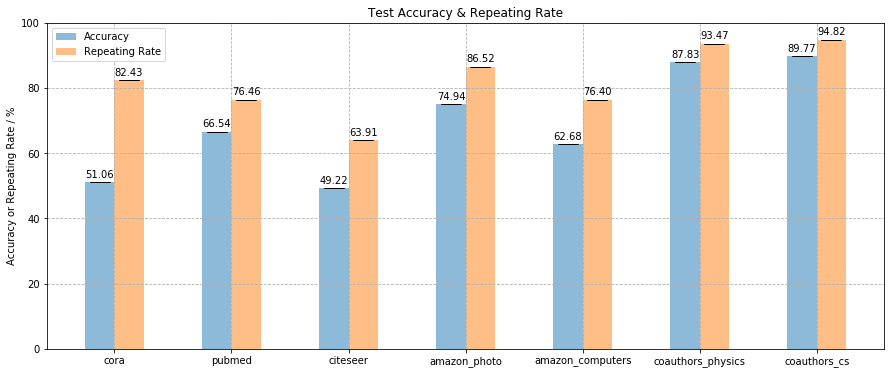

In [55]:
datasets = ["cora", "pubmed", "citeseer", "amazon_photo", "amazon_computers", "coauthors_physics", "coauthors_cs"]

x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width/2, result_df['acc_mean']*100, width, label='Accuracy', yerr=result_df['acc_std'],align='center', alpha=0.5, ecolor='black', capsize=10)
rects2 = ax.bar(x + width/2, result_df['rr_mean']*100, width, label='Repeating Rate',yerr=result_df['rr_std'],align='center', alpha=0.5, ecolor='black', capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy or Repeating Rate / %')
ax.set_title('Test Accuracy & Repeating Rate')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_ylim(0,100)
ax.grid(ls='--')
ax.legend()

autolabel(rects1)
autolabel(rects2)